### A quick notebook to check:
- Satellite tracks in the three files
- FOM of the 3 files (fully plotted)

In [1]:
# import stuff
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import core.functions as func
import numpy as np
import matplotlib.pyplot as plt


#### Satellite track code

In [2]:

def load_and_plot(file_path, title = "Low pressure track energies"):
    '''
    load in data and plot low pressure track energies    
    '''
    file = func.load_data(file_path)
    tracks = file[0]
    particles = file[1]
    evtmap = file[2]

    func.energy_track_plots(tracks, title)

def load_and_plot_and_cut(file_path, title = "Low pressure track energies"):
    '''
    load in data and plot low pressure track energies    
    '''
    # load
    file = func.load_data(file_path)
    tracks = file[0]
    particles = file[1]
    evtmap = file[2]

    # cut
    tracks_low_E = func.remove_low_E_events(tracks)

    # plot
    func.energy_track_plots(tracks_low_E, title)

def load_plot_cut_FOM(file_path, title = "Low pressure track energies"):
    '''
    load in data and plot low pressure track energies    
    '''
    # load
    file = func.load_data(file_path)
    tracks = file[0]
    particles = file[1]
    evtmap = file[2]

    # cut MODIFIED TO JUST REMOVE THEM AT THIS TIME
    tracks_low_E = func.remove_low_E_events(tracks)

    # apply cuts
    cuts = np.linspace(0,0.6, 61, endpoint = True)

    cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)
    fom_vals = func.apply_FOM(file_path, cut_tracks[0], cut_list = cuts, plot = True, plot_title = title)
    return fom_vals


def blob_positron_plot(ecut_rel, ecut_no_positron_df, save = False, save_title = 'plot.png', blob_label = "- events with no e+"):
    '''
    Plots the blob energies with and without positrons.
    '''
    # make range full range of blob1 and blob2
    eblob_full = []
    eblob_full.append(ecut_rel['eblob1'].to_numpy())
    eblob_full.append(ecut_rel['eblob2'].to_numpy())
    minimum_e = np.min(eblob_full)
    maximum_e = np.max(eblob_full)

    # the original way
    func.plot_hist(ecut_rel, column = 'eblob2', binning = 20, title = "Blob energies", output = False, fill = False, label = 'blob 2', x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)
    func.plot_hist(ecut_rel, column = 'eblob1', binning = 20, title = "Blob energies", output = False, fill = False, label = 'blob 1', x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)

    #plt.hist(no_pos_blob1, bins = 20, label = 'events with no e+', range = (minimum_e, maximum_e))
    #plt.hist(no_pos_blob2, bins = 20, label = 'events with no e+', range = (minimum_e, maximum_e))

    func.plot_hist(ecut_no_positron_df, column = 'eblob1', binning = 20, title = "Blob energies", output = False, fill = True, label = blob_label, x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)
    func.plot_hist(ecut_no_positron_df, column = 'eblob2', binning = 20, title = "Blob energies", output = False, fill = True, label = blob_label, x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)

    plt.legend()

    if (save == True):
        plt.savefig(save_title)
    plt.show()


def plot_blob2(data_path, title = "blob2 plot"):

    file = func.load_data(data_path)
    tracks = file[0]


    # cut
    tracks_low_E = func.remove_low_E_events(tracks)

    cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)

    pos_df = func.positron_scraper(data_path)
    pos_events = (np.unique(pos_df['event_id'].to_numpy()))*2
    ecut_no_positron_df = cut_tracks[~cut_tracks['event'].isin(pos_events)]
    ecut_positron_df = cut_tracks[cut_tracks['event'].isin(pos_events)]

    func.plot_hist(cut_tracks, column = 'eblob2', fill = False, label='All tracks')
    func.plot_hist(ecut_no_positron_df, column = 'eblob2', label = 'Background tracks')
    func.plot_hist(ecut_positron_df, column = 'eblob2', title = title, label = 'Positron tracks')
    plt.legend()
    plt.show()

# read in the data files
#file_60_8 = func.load_data('data/60_8e-3/isaura/')
#tracks_60 = file_60_8[0]
#particles_60 = file_60_8[1]
#evtmap = file_60_8[2]
#file_75_8 = func.load_data('data/75_8e-3/isaura/')
#file_90_8 = func.load_data('data/90_8e-3/isaura/')

50
100
150
200
250
300
No limits applied


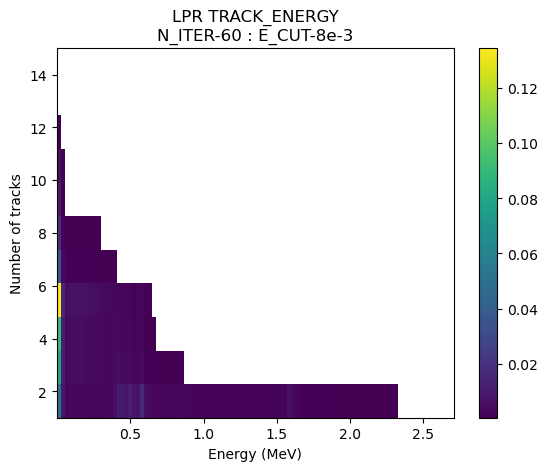

50
100
150
200
250
300
No limits applied


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


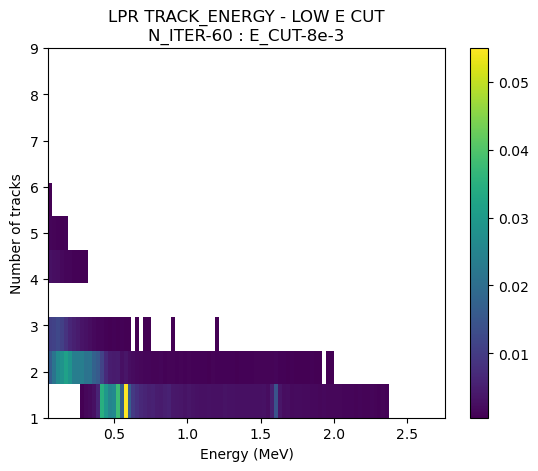

In [4]:
load_and_plot('data/60_8e-3/isaura/', 'LPR TRACK_ENERGY\nN_ITER-60 : E_CUT-8e-3')
load_and_plot_and_cut('data/60_8e-3/isaura/', 'LPR TRACK_ENERGY - LOW E CUT\nN_ITER-60 : E_CUT-8e-3')

50
100
150
200
250
300
No limits applied


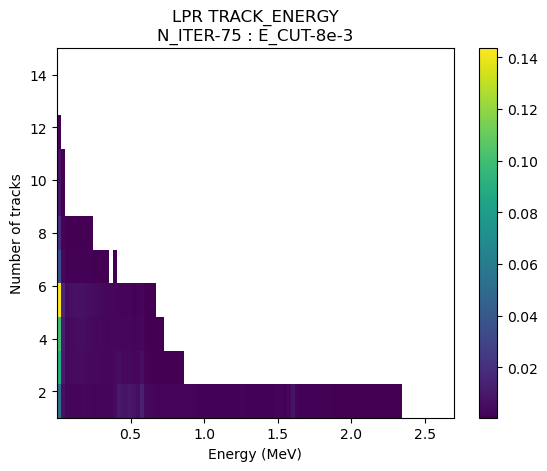

50
100
150
200
250
300
No limits applied


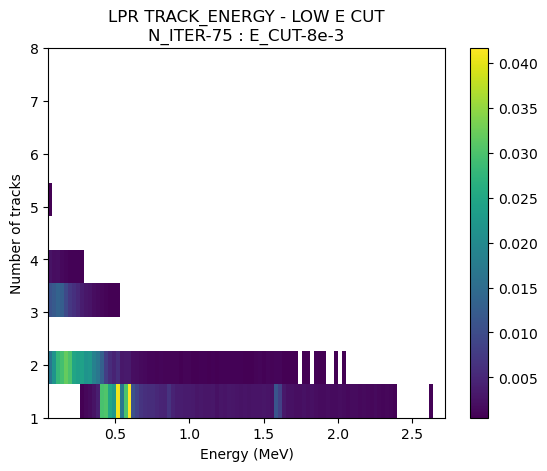

In [5]:
load_and_plot('data/75_8e-3/isaura/', 'LPR TRACK_ENERGY\nN_ITER-75 : E_CUT-8e-3')
load_and_plot_and_cut('data/75_8e-3/isaura/', 'LPR TRACK_ENERGY - LOW E CUT\nN_ITER-75 : E_CUT-8e-3')

50
100
150
200
250
300
No limits applied


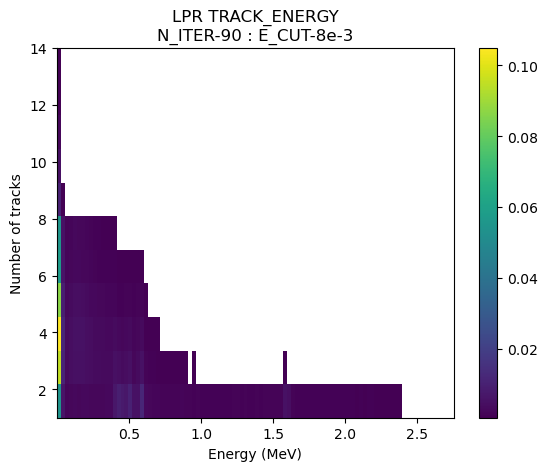

50
100
150
200
250
300
No limits applied


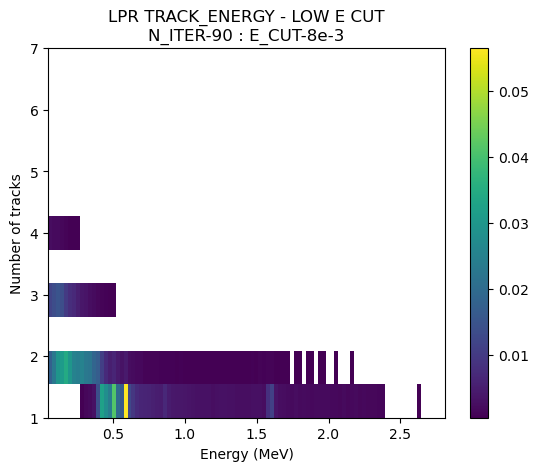

In [6]:
load_and_plot('data/90_8e-3/isaura/', 'LPR TRACK_ENERGY\nN_ITER-90 : E_CUT-8e-3')
load_and_plot_and_cut('data/90_8e-3/isaura/', 'LPR TRACK_ENERGY - LOW E CUT\nN_ITER-90 : E_CUT-8e-3')

### FOM now

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 47.14 %
Absolute Cut efficiency:
Efficiency: 47.14 %
One track cut
Relative Cut efficiency:
Efficiency: 71.80 %
Absolute Cut efficiency:
Efficiency: 65.34 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 71.50 %
Absolute Cut efficiency:
Efficiency: 65.75 %
Energy cut
Relative Cut efficiency:
Efficiency: 11.11 %
Absolute Cut efficiency:
Efficiency: 6.47 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:406: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1022: RuntimeWarning: invalid value encountered in double_scalars
  f_error = f*np.sqrt((a_error/a)**2 +(b_error/b)**2)
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1035: RuntimeWarning: divide by zero encountered in double_scalars
  element_1 = np.square(a_error/np.sqrt(b))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:406: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


FOM values:
[1.00000000e+000 1.00000000e+000 1.00542527e+000 1.02412247e+000
 1.07546411e+000 1.15087607e+000 1.26377394e+000 1.39226376e+000
 1.50110382e+000 1.62974432e+000 1.75078810e+000 1.84551560e+000
 1.99859038e+000 2.13634041e+000 2.23795526e+000 2.28193297e+000
 2.39460906e+000 2.44898786e+000 2.53223218e+000 2.55553960e+000
 2.65701041e+000 2.67837621e+000 2.76503563e+000 2.82103205e+000
 2.85424747e+000 2.87608405e+000 2.97669448e+000 3.04949887e+000
 3.23947113e+000 3.27242313e+000 3.30884041e+000 3.45380350e+000
 3.38830726e+000 3.37941870e+000 3.67582090e+000 3.59612436e+000
 3.59941237e+000 3.52123219e+000 2.91759239e+000 2.47045179e+000
 2.10156080e+000 2.02653044e+000 1.65220316e+000 1.43276993e+000
 1.20042886e+000 1.63206318e+000 1.45320694e+000 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 0.00000000e+000 0.00000000e+000
 0.00000000e+

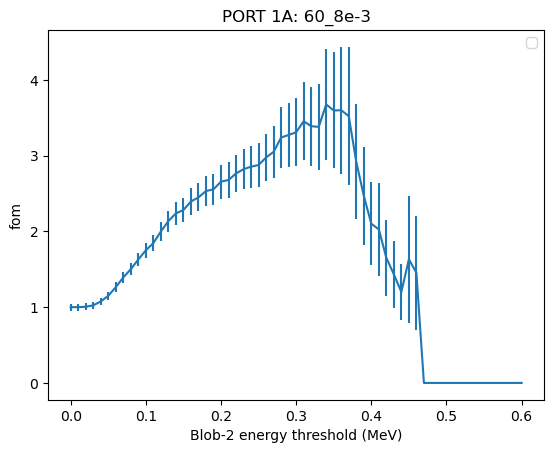

In [3]:
fom_60 = load_plot_cut_FOM('data/60_8e-3/isaura/', title = "PORT 1A: 60_8e-3")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.56 %
Absolute Cut efficiency:
Efficiency: 46.56 %
One track cut
Relative Cut efficiency:
Efficiency: 72.18 %
Absolute Cut efficiency:
Efficiency: 65.24 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 72.75 %
Absolute Cut efficiency:
Efficiency: 65.79 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.96 %
Absolute Cut efficiency:
Efficiency: 6.12 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:406: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1022: RuntimeWarning: invalid value encountered in double_scalars
  f_error = f*np.sqrt((a_error/a)**2 +(b_error/b)**2)
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1035: RuntimeWarning: divide by zero encountered in double_scalars
  element_1 = np.square(a_error/np.sqrt(b))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:406: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


FOM values:
[1.00000000e+000 1.00000000e+000 1.00161347e+000 1.01734422e+000
 1.04987627e+000 1.13418510e+000 1.23325490e+000 1.35891321e+000
 1.50275195e+000 1.60334895e+000 1.70678941e+000 1.82392537e+000
 1.94682632e+000 2.06638348e+000 2.13853298e+000 2.25113637e+000
 2.35890224e+000 2.46543156e+000 2.47568161e+000 2.56754977e+000
 2.56156145e+000 2.61891139e+000 2.62241410e+000 2.69621624e+000
 2.63976396e+000 2.80091400e+000 2.84263249e+000 2.99201956e+000
 3.32882494e+000 3.45737794e+000 3.52595489e+000 3.52330684e+000
 3.26983152e+000 3.36591291e+000 2.97810121e+000 2.60492390e+000
 2.79605215e+000 2.37485198e+000 2.07911570e+000 1.75649430e+000
 1.45179631e+000 1.29585147e+000 1.25124154e+000 1.06465289e+000
 1.17968184e+000 1.47075760e+000 1.11953190e+000 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+

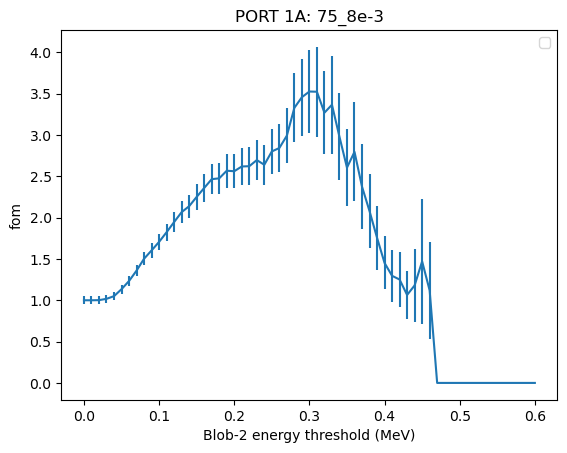

In [4]:
fom_75 = load_plot_cut_FOM('data/75_8e-3/isaura/', title = "PORT 1A: 75_8e-3")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.16 %
Absolute Cut efficiency:
Efficiency: 46.16 %
One track cut
Relative Cut efficiency:
Efficiency: 72.41 %
Absolute Cut efficiency:
Efficiency: 65.14 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 73.81 %
Absolute Cut efficiency:
Efficiency: 66.16 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.73 %
Absolute Cut efficiency:
Efficiency: 5.89 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:406: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1022: RuntimeWarning: invalid value encountered in double_scalars
  f_error = f*np.sqrt((a_error/a)**2 +(b_error/b)**2)
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1035: RuntimeWarning: divide by zero encountered in double_scalars
  element_1 = np.square(a_error/np.sqrt(b))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:406: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


FOM values:
[1.00000000e+000 1.00000000e+000 9.99421683e-001 1.00760066e+000
 1.03830061e+000 1.11153895e+000 1.21826846e+000 1.33516576e+000
 1.50653467e+000 1.60227677e+000 1.69506268e+000 1.83192370e+000
 1.97007482e+000 2.10190262e+000 2.19493806e+000 2.25018601e+000
 2.46054652e+000 2.51972081e+000 2.55474518e+000 2.53563397e+000
 2.58901278e+000 2.71930994e+000 2.77807352e+000 2.75183785e+000
 2.75141814e+000 2.90723131e+000 3.01239860e+000 3.21951417e+000
 3.47718592e+000 3.80872438e+000 3.57106998e+000 3.46857472e+000
 3.18570699e+000 3.19406638e+000 3.18404907e+000 2.92755622e+000
 2.53839467e+000 2.11385480e+000 1.83082821e+000 1.68584298e+000
 1.44362416e+000 1.38654143e+000 1.26332073e+000 1.30213737e+000
 1.14894474e+000 8.57878740e-001 1.01824136e+000 7.14935423e-001
 5.19953035e-001 3.46635357e-001 1.73317678e-001 1.51652969e-001
 8.66588392e-002 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+

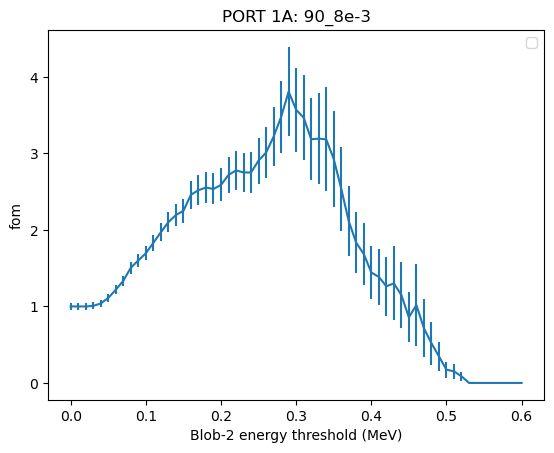

In [5]:
fom_90 = load_plot_cut_FOM('data/90_8e-3/isaura/', title = "PORT 1A: 90_8e-3")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 45.62 %
Absolute Cut efficiency:
Efficiency: 45.62 %
One track cut
Relative Cut efficiency:
Efficiency: 69.70 %
Absolute Cut efficiency:
Efficiency: 62.49 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 73.49 %
Absolute Cut efficiency:
Efficiency: 67.27 %
Energy cut
Relative Cut efficiency:
Efficiency: 11.18 %
Absolute Cut efficiency:
Efficiency: 6.50 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:408: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1038: RuntimeWarning: invalid value encountered in double_scalars
  f_error = f*np.sqrt((a_error/a)**2 +(b_error/b)**2)
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1051: RuntimeWarning: divide by zero encountered in double_scalars
  element_1 = np.square(a_error/np.sqrt(b))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:408: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


ns, nb
[1420, 1420, 1420, 1410, 1401, 1392, 1378, 1360, 1338, 1301, 1267, 1238, 1218, 1183, 1154, 1115, 1086, 1055, 1028, 993, 973, 953, 916, 890, 855, 827, 798, 780, 754, 718, 680, 650, 605, 559, 504, 452, 409, 356, 321, 276, 237, 204, 173, 140, 124, 100, 80, 68, 53, 43, 34, 28, 18, 12, 8, 6, 3, 2, 0, 0, 0, 0]
[887, 887, 887, 871, 839, 766, 660, 540, 430, 342, 277, 235, 192, 162, 142, 118, 104, 88, 78, 70, 65, 59, 54, 49, 43, 41, 38, 34, 28, 23, 19, 17, 15, 15, 13, 11, 9, 8, 8, 7, 7, 7, 7, 7, 7, 5, 3, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
FOM values:
[1.00000000e+000 1.00000000e+000 1.00203641e+000 1.01444994e+000
 1.05486848e+000 1.12499532e+000 1.22748302e+000 1.35330396e+000
 1.47549489e+000 1.59665173e+000 1.69379240e+000 1.84361460e+000
 1.94939884e+000 2.03111775e+000 2.15281807e+000 2.23350342e+000
 2.35876453e+000 2.44128948e+000 2.48927968e+000 2.53121845e+000
 2.60219813e+000 2.61440015e+000 2.66664640e+000 2.73467268e+000
 2.70886303e+000 2.71509205e+000 2.80561846e+

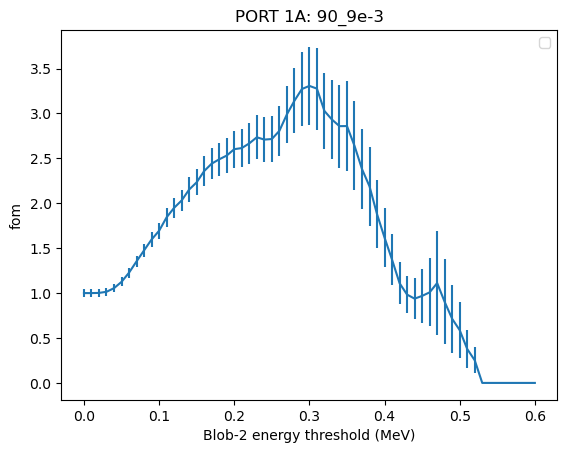

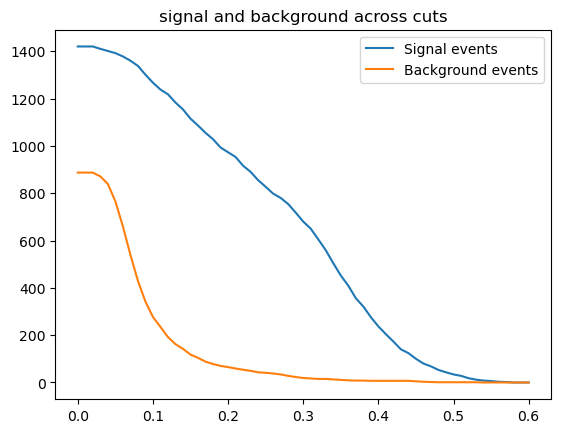

In [3]:
fom_90_9 = load_plot_cut_FOM('data/90_9e-3/isaura/', title = "PORT 1A: 90_9e-3")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.31 %
Absolute Cut efficiency:
Efficiency: 46.31 %
One track cut
Relative Cut efficiency:
Efficiency: 68.36 %
Absolute Cut efficiency:
Efficiency: 61.95 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 71.25 %
Absolute Cut efficiency:
Efficiency: 66.90 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.95 %
Absolute Cut efficiency:
Efficiency: 6.62 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1038: RuntimeWarning: invalid value encountered in double_scalars
  f_error = f*np.sqrt((a_error/a)**2 +(b_error/b)**2)
No handles with labels found to put in legend.


ns, nb
[1298, 1298, 1298, 1289, 1276, 1261, 1244, 1220, 1195, 1168, 1143, 1120, 1097, 1072, 1041, 1017, 998, 966, 943, 917, 897, 871, 848, 829, 812, 784, 758, 737, 714, 689, 658, 632, 607, 573, 537, 486, 446, 411, 363, 327, 281, 248, 217, 178, 146, 126, 109, 93, 74, 61, 47, 39, 29, 24, 18, 15, 9, 6, 5, 2, 1, 0]
[801, 801, 801, 775, 715, 630, 530, 434, 353, 294, 245, 213, 179, 160, 135, 112, 103, 91, 78, 71, 64, 60, 58, 53, 50, 45, 41, 37, 33, 27, 22, 21, 19, 17, 16, 15, 15, 14, 12, 11, 11, 11, 10, 10, 10, 10, 8, 7, 5, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
FOM values:
[1.         1.         1.00958673 1.04049313 1.09543441 1.17821354
 1.27689895 1.38682646 1.48528824 1.59222616 1.67328449 1.7878113
 1.84789104 1.95355396 2.09533519 2.14414176 2.20799454 2.32812319
 2.37291252 2.44480385 2.45179466 2.42785878 2.4828939  2.5038747
 2.54830479 2.58118328 2.64185022 2.71008434 2.89120513 3.05883548
 3.0071078  3.03636136 3.03020302 2.92722334 2.73610151 2.51090797
 2.39507639 2.28484934 2.

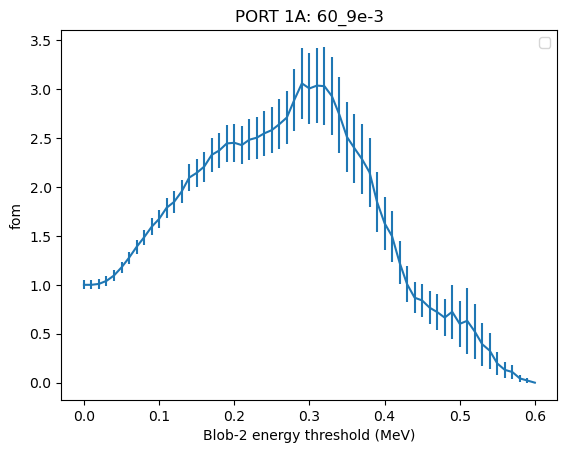

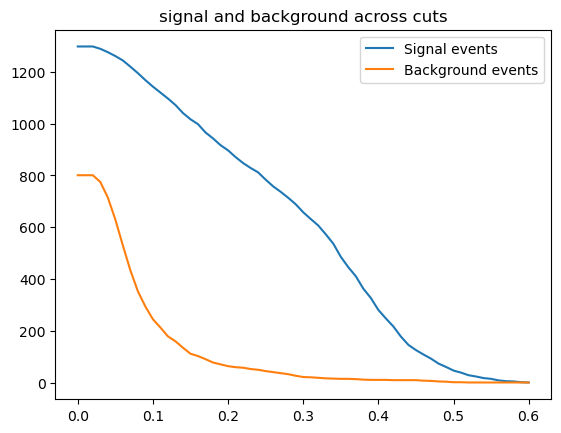

In [4]:
fom_60_9 = load_plot_cut_FOM('data/60_9e-3/isaura/', title = "PORT 1A: 60_9e-3")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 45.86 %
Absolute Cut efficiency:
Efficiency: 45.86 %
One track cut
Relative Cut efficiency:
Efficiency: 69.17 %
Absolute Cut efficiency:
Efficiency: 62.26 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 72.20 %
Absolute Cut efficiency:
Efficiency: 66.87 %
Energy cut
Relative Cut efficiency:
Efficiency: 11.14 %
Absolute Cut efficiency:
Efficiency: 6.59 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:408: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1038: RuntimeWarning: invalid value encountered in double_scalars
  f_error = f*np.sqrt((a_error/a)**2 +(b_error/b)**2)
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:1051: RuntimeWarning: divide by zero encountered in double_scalars
  element_1 = np.square(a_error/np.sqrt(b))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:408: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


ns, nb
[1376, 1376, 1376, 1369, 1360, 1352, 1330, 1312, 1288, 1253, 1222, 1195, 1175, 1144, 1116, 1088, 1061, 1028, 1004, 971, 943, 929, 900, 875, 851, 825, 794, 772, 751, 715, 678, 645, 618, 586, 533, 477, 443, 396, 353, 307, 260, 224, 192, 159, 138, 120, 97, 78, 69, 45, 37, 29, 20, 14, 10, 4, 4, 2, 1, 1, 0, 0]
[844, 844, 844, 825, 781, 703, 593, 489, 384, 315, 254, 215, 185, 158, 131, 112, 100, 84, 74, 68, 63, 62, 54, 52, 46, 44, 40, 37, 34, 27, 23, 20, 17, 16, 15, 14, 12, 10, 9, 8, 8, 8, 8, 8, 7, 7, 5, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
FOM values:
[1.00000000e+000 1.00000000e+000 1.00630415e+000 1.02746297e+000
 1.07659366e+000 1.15312685e+000 1.25265707e+000 1.38772381e+000
 1.49055698e+000 1.61885197e+000 1.72068536e+000 1.82391583e+000
 1.92154372e+000 2.05864440e+000 2.17056439e+000 2.24010396e+000
 2.36813393e+000 2.46416987e+000 2.48609410e+000 2.50838507e+000
 2.49099387e+000 2.58582077e+000 2.56188228e+000 2.64913099e+000
 2.62591340e+000 2.65059452e+000 2.6795954

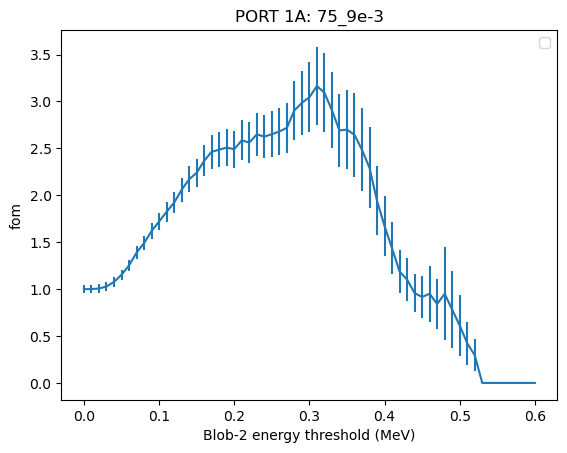

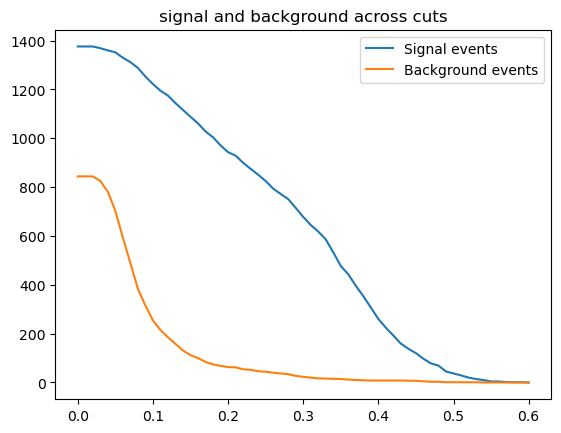

In [5]:
fom_75_9 = load_plot_cut_FOM('data/75_9e-3/isaura/', title = "PORT 1A: 75_9e-3")

In [6]:
print("60_9e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_60_9[2], fom_60_9[3]))
print("===============================")
print("75_9e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_75_9[2], fom_75_9[3]))
print("===============================")
print("90_9e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_90_9[2], fom_90_9[3]))

60_9e-3
FOM max: 3.058835478396092
Blob-2 threshold: 0.29
75_9e-3
FOM max: 3.164585281262938
Blob-2 threshold: 0.31
90_9e-3
FOM max: 3.306453058906558
Blob-2 threshold: 0.3


In [24]:
print("60_8e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_60[2], fom_60[3]))
print("===============================")
print("75_8e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_75[2], fom_75[3]))
print("===============================")
print("90_8e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_90[2], fom_90[3]))

60_8e-3
FOM max: 3.675820899877574
Blob-2 threshold: 0.34
75_8e-3
FOM max: 3.5259548925864133
Blob-2 threshold: 0.3
90_8e-3
FOM max: 3.8087243767159182
Blob-2 threshold: 0.29


### Looking further at the blob_2 value plots

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 47.14 %
Absolute Cut efficiency:
Efficiency: 47.14 %
One track cut
Relative Cut efficiency:
Efficiency: 71.80 %
Absolute Cut efficiency:
Efficiency: 65.34 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 71.50 %
Absolute Cut efficiency:
Efficiency: 65.75 %
Energy cut
Relative Cut efficiency:
Efficiency: 11.11 %
Absolute Cut efficiency:
Efficiency: 6.47 %
60_8e-3


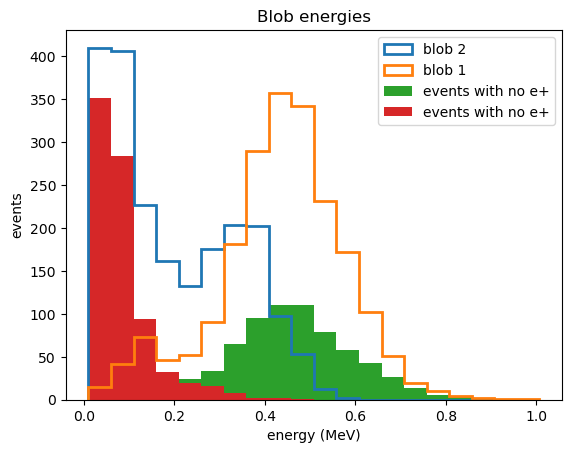

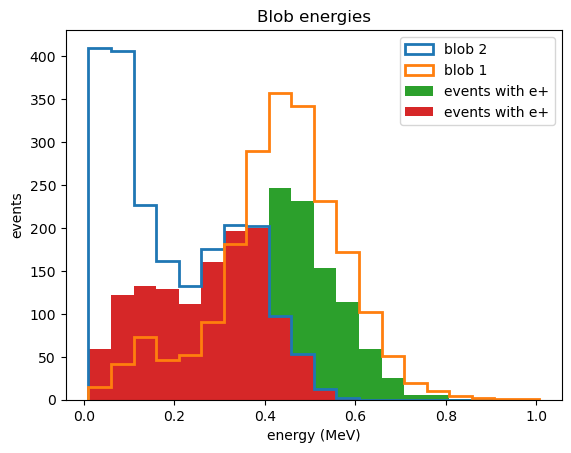

In [3]:
file = func.load_data('data/60_8e-3/isaura/')
tracks = file[0]
particles = file[1]
evtmap = file[2]


# cut
tracks_low_E = func.remove_low_E_events(tracks)

cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)

# collect positron events
pos_df = func.positron_scraper('data/60_8e-3/isaura/')

pos_events = (np.unique(pos_df['event_id'].to_numpy()))*2
ecut_no_positron_df = cut_tracks[0][~cut_tracks[0]['event'].isin(pos_events)]
ecut_positron_df = cut_tracks[0][cut_tracks[0]['event'].isin(pos_events)]

print("60_8e-3")
blob_positron_plot(cut_tracks[0], ecut_no_positron_df, blob_label = "events with no e+")
blob_positron_plot(cut_tracks[0], ecut_positron_df, blob_label = "events with e+")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.56 %
Absolute Cut efficiency:
Efficiency: 46.56 %
One track cut
Relative Cut efficiency:
Efficiency: 72.18 %
Absolute Cut efficiency:
Efficiency: 65.24 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 72.75 %
Absolute Cut efficiency:
Efficiency: 65.79 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.96 %
Absolute Cut efficiency:
Efficiency: 6.12 %
75_8e-3


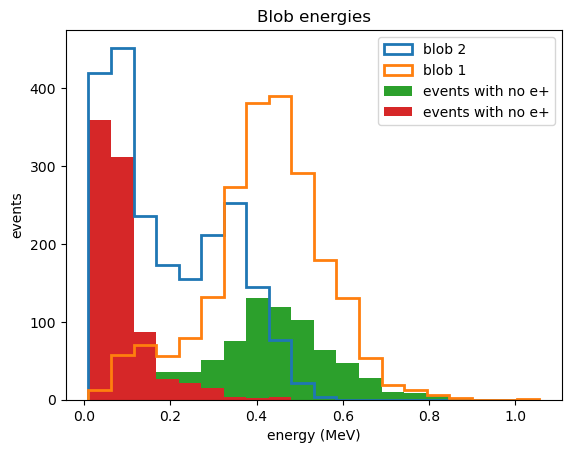

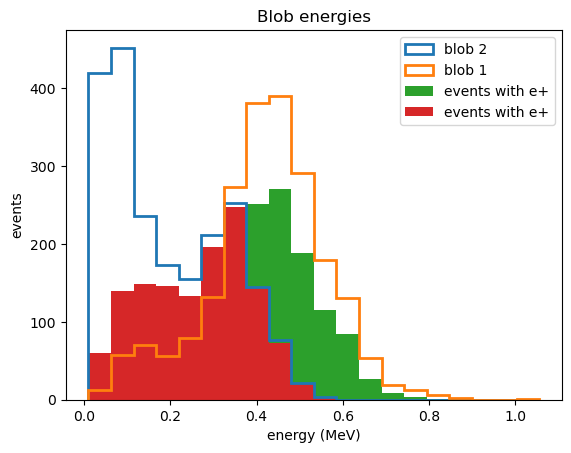

In [76]:
file = func.load_data('data/75_8e-3/isaura/')
tracks = file[0]
particles = file[1]
evtmap = file[2]


# cut
tracks_low_E = func.remove_low_E_events(tracks)

cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)

# collect positron events
pos_df = func.positron_scraper('data/75_8e-3/isaura/')

pos_events = (np.unique(pos_df['event_id'].to_numpy()))*2
ecut_no_positron_df = cut_tracks[0][~cut_tracks[0]['event'].isin(pos_events)]
ecut_positron_df = cut_tracks[0][cut_tracks[0]['event'].isin(pos_events)]

print("75_8e-3")
blob_positron_plot(cut_tracks[0], ecut_no_positron_df, blob_label = "events with no e+")
blob_positron_plot(cut_tracks[0], ecut_positron_df, blob_label = "events with e+")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.16 %
Absolute Cut efficiency:
Efficiency: 46.16 %
One track cut
Relative Cut efficiency:
Efficiency: 72.41 %
Absolute Cut efficiency:
Efficiency: 65.14 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 73.81 %
Absolute Cut efficiency:
Efficiency: 66.16 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.73 %
Absolute Cut efficiency:
Efficiency: 5.89 %
75_8e-3


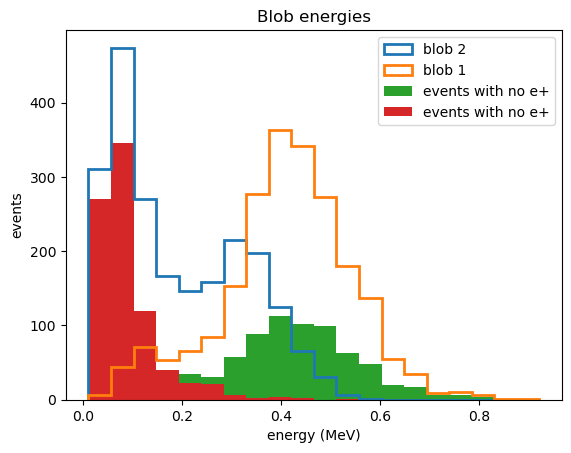

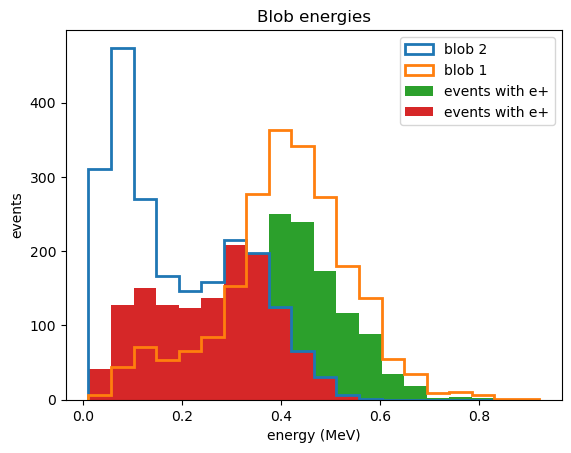

In [77]:
file = func.load_data('data/90_8e-3/isaura/')
tracks = file[0]
particles = file[1]
evtmap = file[2]


# cut
tracks_low_E = func.remove_low_E_events(tracks)

cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)

# collect positron events
pos_df = func.positron_scraper('data/90_8e-3/isaura/')

pos_events = (np.unique(pos_df['event_id'].to_numpy()))*2
ecut_no_positron_df = cut_tracks[0][~cut_tracks[0]['event'].isin(pos_events)]
ecut_positron_df = cut_tracks[0][cut_tracks[0]['event'].isin(pos_events)]

print("75_8e-3")
blob_positron_plot(cut_tracks[0], ecut_no_positron_df, blob_label = "events with no e+")
blob_positron_plot(cut_tracks[0], ecut_positron_df, blob_label = "events with e+")

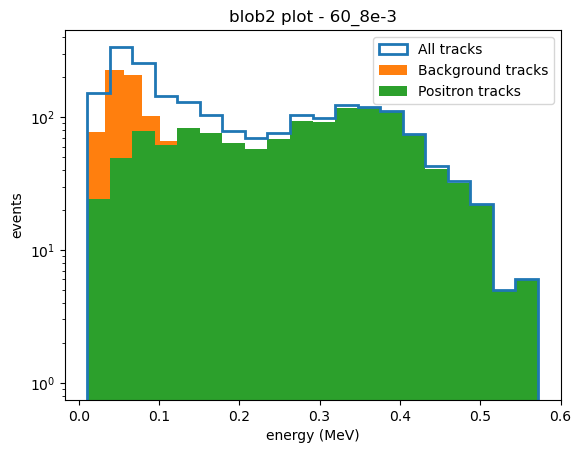

In [25]:
func.plot_hist(cut_tracks[0], column = 'eblob2', fill = False, label='All tracks')
func.plot_hist(ecut_no_positron_df, column = 'eblob2', label = 'Background tracks')
func.plot_hist(ecut_positron_df, column = 'eblob2', title = 'blob2 plot - 60_8e-3', label = 'Positron tracks')
plt.legend()
plt.show()

In [18]:
display(cut_tracks[0])

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
98,5080086,0,1.683154,299.401776,83,7997,1,-240.325,-174.325,1037.969888,...,1062.207128,-217.517480,-41.454428,1044.662387,0.461581,0.069881,0.0,13.444444,14.000000,13.632267
197,5080188,0,1.596666,143.251730,55,9063,1,157.675,107.675,732.606853,...,784.980713,245.719764,183.798511,738.903604,0.517204,0.304872,0.0,13.714286,14.142857,13.750328
408,5080380,0,1.525134,191.469686,54,8325,1,13.675,-252.325,90.152139,...,100.682260,88.084846,-139.105546,211.835034,0.263974,0.044767,0.0,13.833333,14.875000,13.890411
537,5080496,0,1.594726,157.208665,57,9428,1,142.675,-164.325,324.260803,...,348.166712,152.496893,-122.751087,333.828100,0.433415,0.414050,0.0,14.142857,13.142857,13.214012
553,5080512,0,1.597181,97.821970,42,9700,1,200.675,202.675,573.029888,...,580.205114,246.861629,211.379999,621.206025,0.462966,0.315179,0.0,13.750000,13.333333,13.990134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212559,4060532,0,1.596029,150.645399,69,7771,1,110.675,-361.325,835.419309,...,890.923373,208.832805,-340.823027,918.950299,0.107479,0.056593,0.0,13.250000,13.500000,12.964603
212568,4060546,0,1.594818,355.374934,88,9029,1,204.675,77.675,414.406552,...,452.170892,253.836848,209.435464,598.950967,0.474162,0.088262,0.0,14.388889,14.333333,14.974436
212574,4060550,0,1.624089,247.751123,81,9270,1,-44.325,-183.325,532.076081,...,714.992822,-5.082216,-162.844441,535.448702,0.441376,0.073843,0.0,14.500000,12.200000,14.726810
212628,4060606,0,1.592988,79.387576,44,9171,1,66.675,4.675,499.630786,...,533.031203,75.628319,25.371512,522.271665,0.433791,0.367558,0.0,14.000000,13.250000,13.244479


60_8e-3


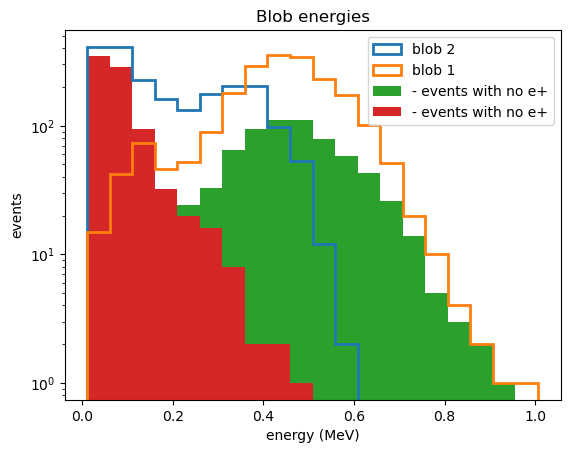

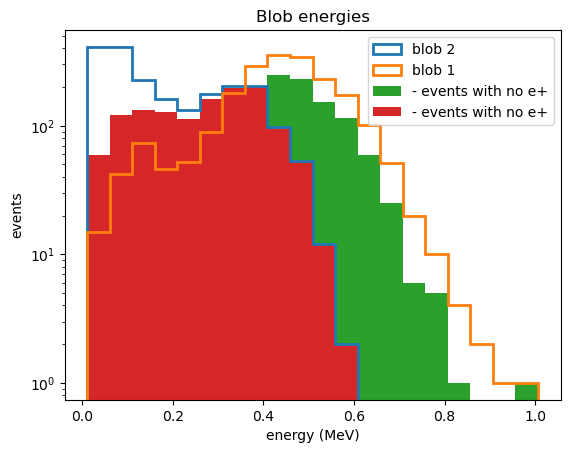

In [68]:
print("60_8e-3")
func.blob_positron_plot(cut_tracks[0], ecut_no_positron_df)
func.blob_positron_plot(cut_tracks[0], ecut_positron_df)

60_8e-3


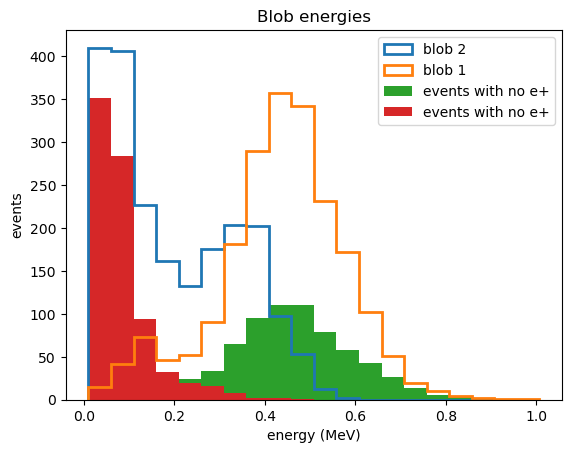

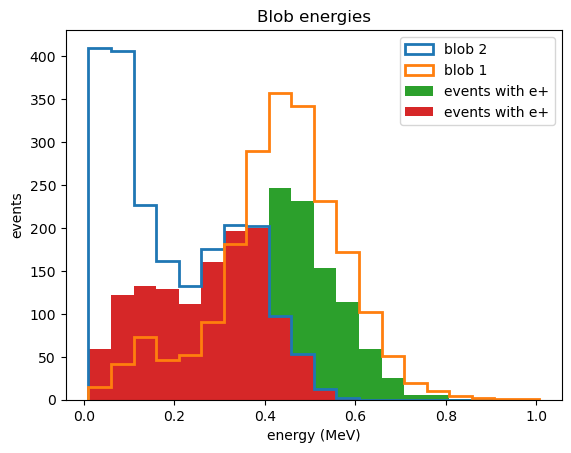

In [67]:
display(pos_events[11264])
display(ecut_positron_df)

5080188

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
197,5080188,0,1.596666,143.251730,55,9063,1,157.675,107.675,732.606853,...,784.980713,245.719764,183.798511,738.903604,0.517204,0.304872,0.0,13.714286,14.142857,13.750328
537,5080496,0,1.594726,157.208665,57,9428,1,142.675,-164.325,324.260803,...,348.166712,152.496893,-122.751087,333.828100,0.433415,0.414050,0.0,14.142857,13.142857,13.214012
553,5080512,0,1.597181,97.821970,42,9700,1,200.675,202.675,573.029888,...,580.205114,246.861629,211.379999,621.206025,0.462966,0.315179,0.0,13.750000,13.333333,13.990134
636,5080582,0,1.597251,146.573076,61,7593,1,296.675,-46.325,681.238031,...,725.635332,337.166187,56.944068,714.316126,0.422622,0.224613,0.0,14.142857,14.500000,13.223831
734,5080676,0,1.594962,142.977149,49,8853,1,179.675,146.675,453.319420,...,464.630347,273.150100,156.986665,509.194918,0.604149,0.368655,0.0,14.571429,14.833333,13.097077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212353,4060350,0,1.594231,180.619138,71,9260,1,51.675,26.675,412.437638,...,443.804809,99.597165,71.943731,540.398029,0.478779,0.422361,0.0,14.750000,13.500000,14.974961
212483,4060472,0,1.595414,106.206510,66,8921,1,82.675,84.675,180.581346,...,190.657476,122.465124,106.985976,257.221128,0.410101,0.139185,0.0,12.666667,14.000000,13.460095
212508,4060498,0,1.591080,150.694614,61,9133,1,14.675,-226.325,487.036988,...,491.892101,37.727892,-216.829778,536.203446,0.471150,0.320035,0.0,13.333333,14.142857,13.392281
212568,4060546,0,1.594818,355.374934,88,9029,1,204.675,77.675,414.406552,...,452.170892,253.836848,209.435464,598.950967,0.474162,0.088262,0.0,14.388889,14.333333,14.974436


50
100
150
200
250
300


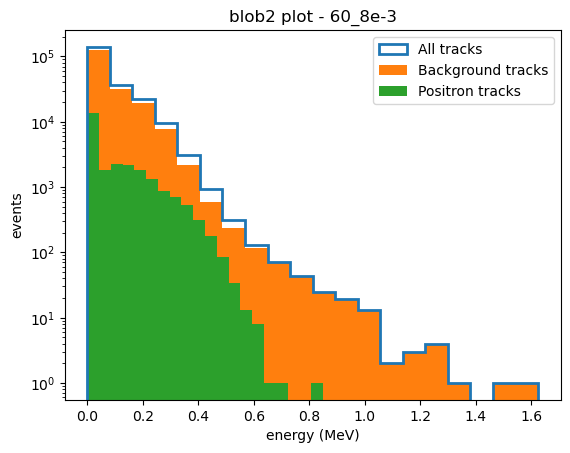

In [12]:
plot_blob2('data/60_8e-3/isaura/', title = "blob2 plot - 60_8e-3")

50
100
150
200
250
300


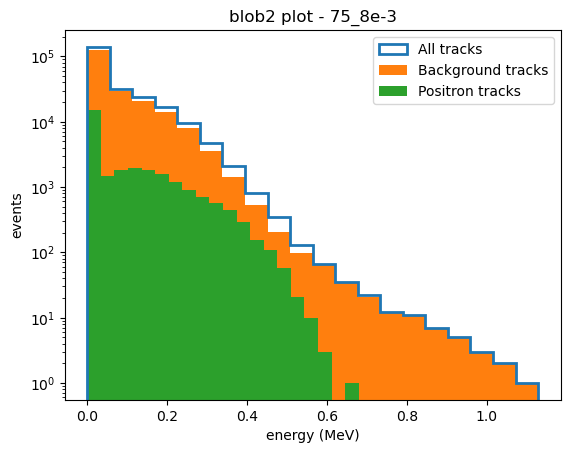

In [13]:
plot_blob2('data/75_8e-3/isaura/', title = "blob2 plot - 75_8e-3")

50
100
150
200
250
300


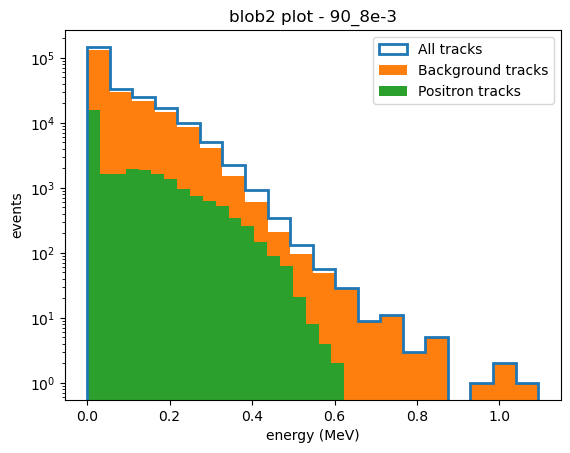

In [14]:
plot_blob2('data/90_8e-3/isaura/', title = "blob2 plot - 90_8e-3")